In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the Data
df = pd.read_csv('algo.csv')

# Step 2: Preprocess the Data
# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Gender', 'Ethnicity', 'Jaundice', 'Family_History_ASD', 'Who_Completed_Test'], drop_first=True)

In [3]:
# Step 3: Split the Data
X = df.drop(columns=['Case_No', 'ASD'])
y = df['ASD']

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Convert 'Yes' to 1 and 'No' to 0 in y_test
y_test_binary = y_test.replace({'Yes': 1, 'No': 0})

# Step 7: Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_probs)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\AppData\Local\Temp\ipykernel_13628\2796313906.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_binary = y_test.replace({'Yes': 1, 'No': 0})


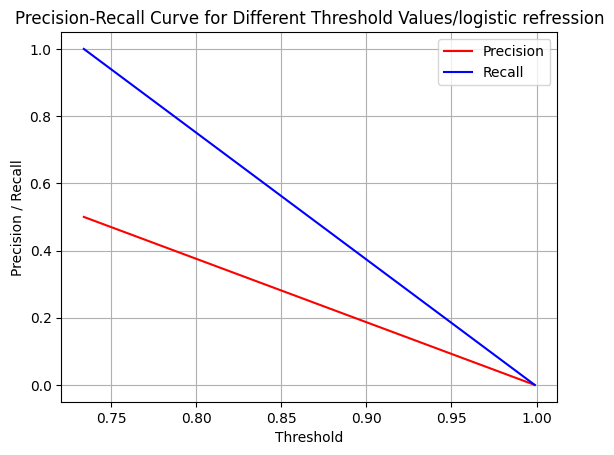

In [6]:
# Step 8: Plot precision-recall curve for different threshold values
plt.plot(thresholds, precision[:-1], color='r', label='Precision')
plt.plot(thresholds, recall[:-1], color='b', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.title('Precision-Recall Curve for Different Threshold Values/logistic refression')
plt.legend()
plt.grid(True)
plt.show()
